## Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Pre-Processing Steps

In [3]:
# Creating the Dataframe
df=pd.read_csv(r"C:\Users\Dell\cognifyz machine learning task\Dataset.csv")

In [4]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)


In [6]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,170,No,No,No,No,4,3.7,Yellow,Good,661
9549,120,No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
df.shape

(9551, 10)

In [8]:
df.info

<bound method DataFrame.info of       Average Cost for two Has Table booking Has Online delivery  \
0                     1100               Yes                  No   
1                     1200               Yes                  No   
2                     4000               Yes                  No   
3                     1500                No                  No   
4                     1500               Yes                  No   
...                    ...               ...                 ...   
9546                    80                No                  No   
9547                   105                No                  No   
9548                   170                No                  No   
9549                   120                No                  No   
9550                    55                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                   No                   No            3               4.

In [9]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [10]:
# Checking for missing values
df.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
# Checking for duplicated values
df.duplicated().sum()

2871

In [12]:
df.dropna(inplace=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Price range'>

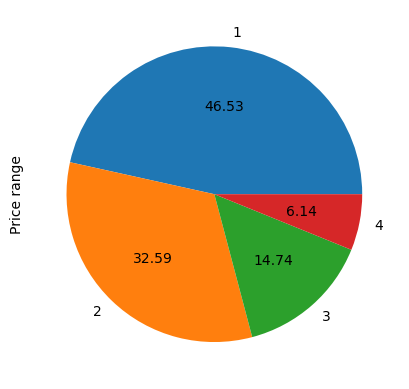

In [14]:
df['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')

<Axes: ylabel='Aggregate rating'>

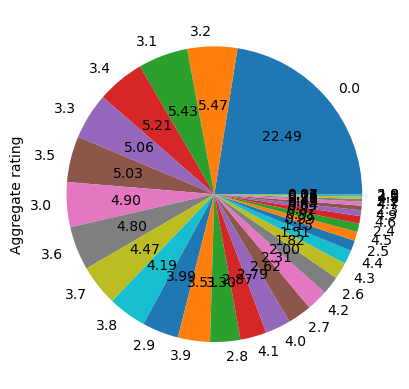

In [15]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.2f')

<Axes: xlabel='Aggregate rating', ylabel='Density'>

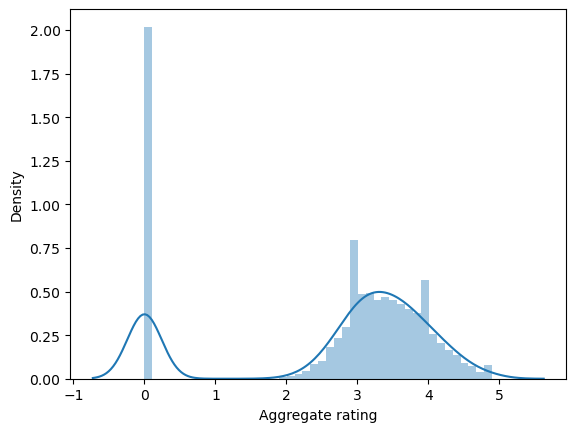

In [16]:
sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Price range', ylabel='Density'>

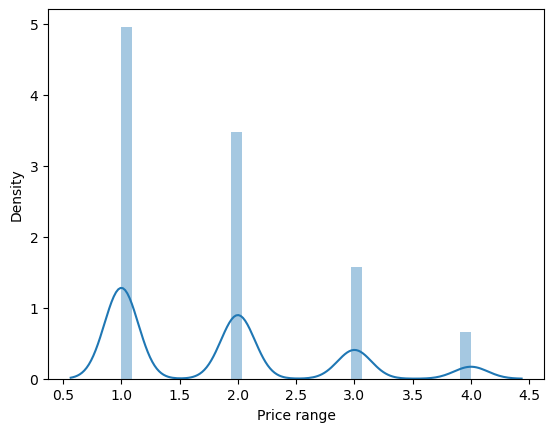

In [17]:
sns.distplot(df['Price range'])

<Axes: xlabel='Rating text', ylabel='Votes'>

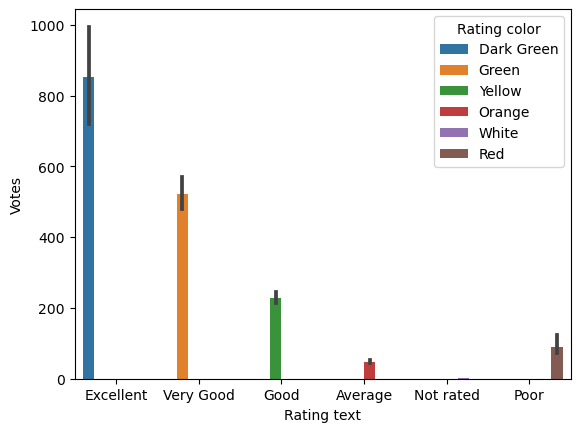

In [18]:
sns.barplot(x=df["Rating text"],y=df["Votes"],hue =df["Rating color"])


<Axes: xlabel='Aggregate rating', ylabel='Votes'>

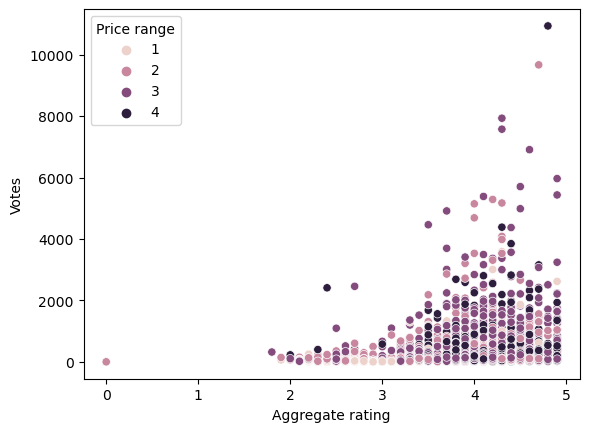

In [19]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])


In [21]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


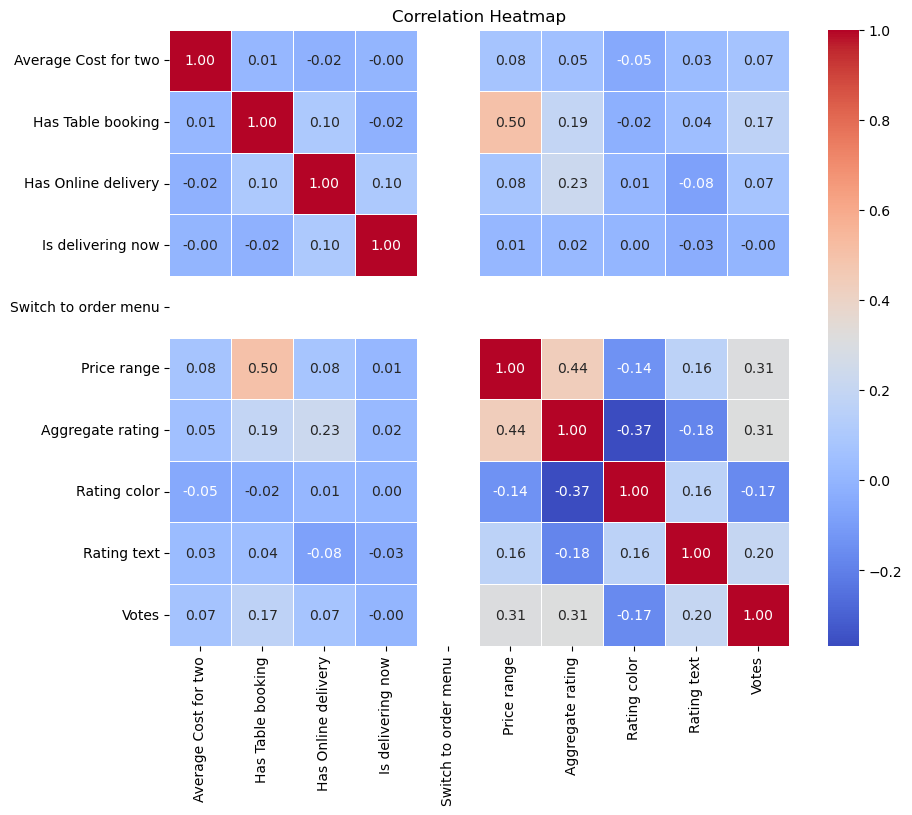

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [24]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

8696    0.0
1164    4.0
4824    3.2
7574    3.2
2961    2.3
Name: Aggregate rating, dtype: float64

## Running the Linear Regression Model

In [26]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4484641996519252

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")


Mean Squared Error (MSE): 1.36
R-squared (R2) Error: 0.45


## Building the Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.977436481045359

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)

DTree.fit(x_train, y_train)

y_predict = DTree.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (RMSE): {mse:.2f}")

# Calculate R-squared (R2) Error
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Error: {r2:.2f}")


Mean Squared Error (RMSE): 0.05
R-squared (R2) Error: 0.98


### Conclusion:
    MSE of 0.05 indicates that model's predictions are very accurate & low errors.
    R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.
    Decision Tree Regressor model is performing exceptionally well on your test data.

